# Q-Learning

In [17]:
import numpy as np
import pandas as pd
import random
import time

### Define States ###
states = []
for i in range(3):
    for j in range(4):
        states.append((i+1, j+1))

### Define Rewards ###
rewards = {}
for state in states:
    # Green Terminal State
    if state == (1,4):
        rewards[state] = 1
    # Red Terminal State
    elif state == (2, 4):
        rewards[state] = -1
    # For all other States
    else:
        rewards[state] = 0
    
### Define Actions ###
# U = Up, D = Down, L = Left, R = Right
actions = {             
    (1, 1): ["D", "R"],
    (1, 2): ["L", "R"],
    (1, 3): ["L", "R", "D"],
    (2, 1): ["U", "D"],             
    (2, 2): ["U", "D", "L", "R"],
    (2, 3): ["U", "R", "D"],
    (3, 1): ["U", "R"],
    (3, 2): ["L", "R"],
    (3, 3): ["L", "U", "R"],
    (3, 4): ["U", "L"]
}

# Function that returns the valid next state, given current state and action
def getNextState(a: str, s: tuple) -> tuple:
    if a == "U":
        next_state = (s[0] - 1, s[1])
        if next_state == (2, 2):
            next_state = (s[0], s[1])

    if a == "D":
        next_state = (s[0] + 1, s[1])
        if next_state == (2, 2):
            next_state = (s[0], s[1])    

    if a == "L":
        next_state = (s[0], s[1] - 1)
        if next_state == (2, 2):
            next_state = (s[0], s[1])

    if a == "R":
        next_state = (s[0], s[1] + 1)
        if next_state == (2, 2):
            next_state = (s[0], s[1])
    
    return next_state

################################################
### Define Q-Table and initialize it with 0  ###
################################################
n_states = len(states)      
n_action = 4

# Initialize Q_Table to all Zeros and convert to pd DataFrame
Q = np.zeros(shape=(n_states, n_action))
Q = pd.DataFrame(Q, columns=["U", "D", "L", "R"], index=states)

print("Q-Table at the beginning:")
display(Q)

### Define Hyperparams ###
GAMMA = 0.9
EPSILON = 0.8
ALPHA = 0.9
EPISODE = 1000

start_time = time.time()
# Q-Learning algorithm:
for i in range(EPISODE):

    # Init (a, b) to (1, 4) so that the while loop always triggers and shuffles new
    (a, b) = (1, 4)

    # Get random start state
    while (a, b) == (1, 4) or (a, b) == (2, 4) or (a, b) == (2, 2):
        a = np.random.choice(a=[1, 2, 3])
        b = np.random.choice(a=[1, 2, 3, 4])

    state = (a, b)
    print(f"Start State at Epsiode {i} is {state}")
    
    # Simulate Episode
    for i in range(100):
        print(f"Current state: {state}")
        
        # Get next state randomly (Exploration)
        # Epsilon decreases in relation to the current episode
        # Thus Epsilon is high at the beginning and low at the end
        if random.random() < EPSILON**i**(1/2):
            # Get random action
            a = np.random.choice([action for action in actions[state]])
            next_state = getNextState(a, state)
            print(f"Random Action '{a}' has been taken. Resulting next state is {next_state}")
        # Get next state from Q-Table (Exploitation)
        else:
            valid_actions = [action for action in actions[state]]
            print(f"Valid Action in state {state} is: {valid_actions}")
            # Get max_a q(state, a) from the Q-Table
            a = list(Q.loc[[state], [action for action in actions[state]]].idxmax(axis=1).values)[0]
            print(f"Max Action in state {state} is: {a}")
            next_state = getNextState(a, state)
            print(f"Next state is: {next_state}")

        # Update Q-Table
        Q.at[state, a] = Q.at[state, a] + ALPHA * (rewards[next_state] + GAMMA * float(Q.loc[[next_state], :].max(axis=1)) - Q.at[state, a])

        # If we reach one terminal state, end the episode
        if next_state == (1, 4) or next_state == (2, 4):
            break

        state = next_state
        

print("Training is finished!")
print("Q-Learning took {} seconds\n".format(time.time() - start_time))
print("Q-Table in the end:")
display(Q)


Q-Table at the beginning:


,U,D,L,R
"(1, 1)",0.0,0.0,0.0,0.0
"(1, 2)",0.0,0.0,0.0,0.0
"(1, 3)",0.0,0.0,0.0,0.0
"(1, 4)",0.0,0.0,0.0,0.0
"(2, 1)",0.0,0.0,0.0,0.0
"(2, 2)",0.0,0.0,0.0,0.0
"(2, 3)",0.0,0.0,0.0,0.0
"(2, 4)",0.0,0.0,0.0,0.0
"(3, 1)",0.0,0.0,0.0,0.0
"(3, 2)",0.0,0.0,0.0,0.0


Start State at Epsiode 0 is (2, 1)
Current state: (2, 1)
Random Action 'D' has been taken. Resulting next state is (3, 1)
Current state: (3, 1)
Valid Action in state (3, 1) is: ['U', 'R']
Max Action in state (3, 1) is: U
Next state is: (2, 1)
Current state: (2, 1)
Random Action 'D' has been taken. Resulting next state is (3, 1)
Current state: (3, 1)
Random Action 'R' has been taken. Resulting next state is (3, 2)
Current state: (3, 2)
Random Action 'R' has been taken. Resulting next state is (3, 3)
Current state: (3, 3)
Random Action 'R' has been taken. Resulting next state is (3, 4)
Current state: (3, 4)
Valid Action in state (3, 4) is: ['U', 'L']
Max Action in state (3, 4) is: U
Next state is: (2, 4)
Start State at Epsiode 1 is (1, 2)
Current state: (1, 2)
Random Action 'R' has been taken. Resulting next state is (1, 3)
Current state: (1, 3)
Valid Action in state (1, 3) is: ['L', 'R', 'D']
Max Action in state (1, 3) is: L
Next state is: (1, 2)
Current state: (1, 2)
Valid Action in st

,U,D,L,R
"(1, 1)",0.0000,0.65610,0.00000,0.8100
"(1, 2)",0.0000,0.00000,0.72900,0.9000
"(1, 3)",0.0000,0.81000,0.81000,1.0000
"(1, 4)",0.0000,0.00000,0.00000,0.0000
"(2, 1)",0.7290,0.59049,0.00000,0.0000
"(2, 2)",0.0000,0.00000,0.00000,0.0000
"(2, 3)",0.9000,0.72900,0.00000,-1.0000
"(2, 4)",0.0000,0.00000,0.00000,0.0000
"(3, 1)",0.6561,0.00000,0.00000,0.6561
"(3, 2)",0.0000,0.00000,0.59049,0.7290


# Print optimal Policy 🚀


In [23]:
# Print optimal policy 
for state in states:
    # Skip terminal states and wall
    if state == (1, 4) or state == (2, 4) or state == (2, 2):
        pass
    # All other non-terminal states 
    else:
        opt_a = list(Q.loc[[state], :].idxmax(axis=1).values)[0]
        #print(f"The optimal action in state {state} is {opt_a}")
        print(f"\pi^*({state}) &= {opt_a} \\")

\pi^*((1, 1)) &= R \
\pi^*((1, 2)) &= R \
\pi^*((1, 3)) &= R \
\pi^*((2, 1)) &= U \
\pi^*((2, 3)) &= U \
\pi^*((3, 1)) &= U \
\pi^*((3, 2)) &= R \
\pi^*((3, 3)) &= U \
\pi^*((3, 4)) &= L \


# Plot Decrease of Epsilon 

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Epsilon')

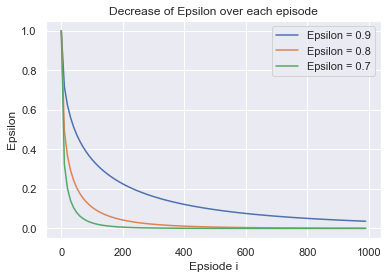

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

def f(x, epsilon):
    return epsilon**x**(1/2)

eps = np.arange(0, 1000, 10)

sns.lineplot(eps, f(eps, 0.9))
sns.lineplot(eps, f(eps, 0.8))
sns.lineplot(eps, f(eps, 0.7))
plt.title("Decrease of Epsilon over each episode")
plt.legend(["Epsilon = 0.9", "Epsilon = 0.8", "Epsilon = 0.7"])
plt.xlabel("Epsiode i")
plt.ylabel("Epsilon")
